# Rateo di Salita
Le ipotesi di partenza sono sempre quelle di velivolo in condizioni non accelerate. 
L'assetto di salita fa sì che la forza peso abbia componenti sia lungo la direzione del moto (parallela alla traiettoria di volo) che perpendicolarmente ad essa.

\begin{align*} 
\text{Equilibrio lungo la traiettoria} \,\, \longrightarrow \,\, T &= D + W \cdot \sin\theta \\ 
\text{Equilibrio lungo la perpendicolare alla traiettoria} \,\, \longrightarrow \,\, L &= W\cdot\cos\theta
\end{align*}

Si nota subito che $L$ è ora un numero pari alla forza peso $W$ moltiplicata per un numero minore di uno (infatti $\cos\theta<1$). Dall'equilibrio lungo la traiettoria si può ricavare
una prima espressione del rateo di salita:

\begin{equation*}
\text{Moltiplicando per la velocità passo alle corrispondenti potenze} \,\, \longrightarrow \,\, T \cdot V_{\infty} = D \cdot V_{\infty} + W \cdot V_{\infty}\sin\theta
\end{equation*}

A questo punto posso dividere ambo i membri per il peso:

\begin{equation}
\boxed{ \frac{T \cdot V_{\infty} - D \cdot V_{\infty}}{W} = V_{\infty}\sin\theta }
\end{equation}

Si vede che a sinistra del segno di uguale abbiamo la differenza tra la potenza disponibile e quella necessaria al volo; questa viene poi divisa per la forza pes. I due membri hanno unità di misura coerenti con una velocità:

\begin{equation*}
\frac{ [N] \cdot [m \cdot s^{-1}] - [N] \cdot [m \cdot s^{-1}] }{ [N] } = [m \cdot s^{-1}]
\end{equation*}

Possiamo allora dare la definizione di **Rateo di Salita** o _velocità ascensionale_:

\begin{equation}
\boxed{ \text{Rateo di salita} \equiv RC \equiv V_{\infty} \cdot \sin\theta}
\end{equation}

Chiaramente, l'angolo di salita si ricava dalle precedenti relazioni semplicemente:

\begin{equation}
\frac{T - D }{W} = \sin\theta \,\, \longrightarrow \,\, \boxed{ \theta = \arcsin \biggl( \frac{T - D }{W} \biggr) }
\end{equation}

Consideriamo un velivolo esempio ed effettuiamo qualche conto:

In [17]:
import numpy as np
import math

# Dati del velivolo
M    = 2268.0;         # Massa del velivolo in [kg]
g    = 9.8065;         # Accelerazione di gravità in [m/s^2]
W    = M * g;          # Peso del velivolo in [N]
S    = 9.29;           # Superficie alare in [m^2]
b    = 7.50;           # Apertura alare in [m]
AR   = b**2/S;         # Allungamento alare
CD0  = 0.028;          # Coefficiente di resistenza Zero-Lift
e    = 0.8;            # Fattore di Oswald
V    = 500.0 * 0.3048  # Velocità di crociera in [m/s]
rho0 = 1.225;          # Densità dell'aria al livello del mare in [kg/m^3] 

# CL in volo livellato
CL = ( 2 * W ) / ( rho0 * V**2 * S)
CD = CD0 + CL**2 / (math.pi * AR * e)
print(f'Coefficiente di portanza in volo orizzontale:{CL : .4f}')
print(f'Coefficiente di resistenza in volo orizzontale:{CD : .4f}')

# Rifacciamo il conto ad un angolo di salita pari a 30°
theta     = (30.0 * math.pi) / (180.0)
CL_salita = ( 2 * W * np.cos(theta) ) / ( rho0 * V**2 * S )
CD_salita = CD0 + ( CL_salita**2 ) / (math.pi * AR * e)
print(f'Coefficiente di portanza in salita:{CL_salita : .4f}')
print(f'Coefficiente di resistenza in salita:{CD_salita : .4f}')


Coefficiente di portanza in volo orizzontale: 0.1683
Coefficiente di resistenza in volo orizzontale: 0.0299
Coefficiente di portanza in salita: 0.1457
Coefficiente di resistenza in salita: 0.0294


Si vede come la resistenza in salita è più piccola della resistenza in volo orizzontale poiché la componente indotta della resistenza si è leggermente ridotta (a causa della riduzione della portanza di un fattore $\cos\theta$).

## Curve Odografe
Un **diagramma odografo** viene definito in un piano $(V_{h}, V_{v})$; quindi, lungo le ascisse avremo la velocità orizzontale del velivolo (quella lungo la traiettoria di volo) e lungo le ordinate avremo i valori del rateo di salita (che sono coincidenti con la velocità verticale). Come si vede dall'immagine, ogni retta che passa per l'origine ed interseca la curva odografa avrà una pendenza pari al rapporto $V_{v} / V_{h}$, andando così a formare l'angolo di salita $\theta$ con l'orizzontale di riferimento. Si vede come pendenze della retta elevate corrispondono ad angoli di salita elevati e che la distanza tra l'origine ed il punto di intersezione con la curva odografa corrisponde alla $V_{\infty}$. Una tangente orizzontale alla curva corrisponde invece al massimo rateo di salita possibile.

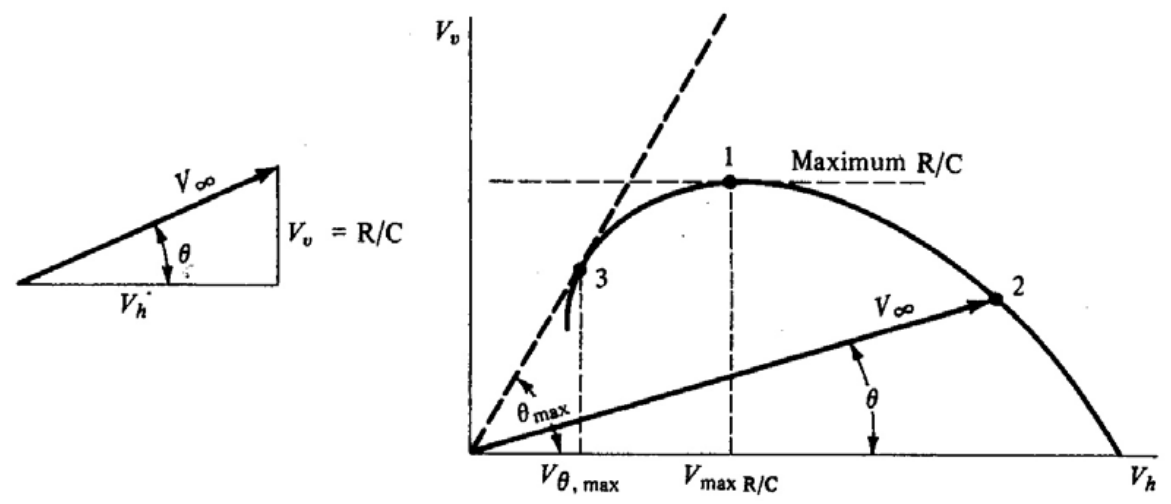

# Approccio Analitico
Dalla relazione

\begin{equation*}
RC = V_{\infty} \cdot \sin\theta = \frac{T}{W} - \frac{D \cdot V_{\infty} }{W}
\end{equation*}

si possono derivare le espressioni per le formule relative a velivoli a getto ed a velivoli motoelica. Si deve tenere presente che per la resistenza vale l'espressione seguente:

\begin{equation}
D = \frac{1}{2} \rho V^{2} S C_D = \frac{1}{2} \rho V^{2} S \cdot (C_{D_{0}} + K \cdot C_{L}^{2}) = \frac{1}{2} \rho V^{2} S \cdot \biggl(C_{D_{0}} + K \cdot \biggl( \frac{2W}{\rho V^{2} S} \biggr)^{2} \biggr)
\end{equation}

L'approccio analitico non è importantissimo ai fini del superamento dell'esame.

# Quote di tangenza
Per **quota di tangenza**, _teorica_ o _pratica_, si intende, rispettivamente:

* La quota alla quale il massimo rateo di salita è uguale a zero ($RC = 0$).
* La quota alla quale il massimo rate di salita è uguale a $0.5$ metri al secondo ($RC = 0.5\,\,m\cdot s^{-1}$).

Un piccolo script in Python chiarisce quanto appena detto per un velivolo motoelica. I punti svolti sono i seguenti:

* Calcolo del **Punto P** della polare del velivolo. 
* Calcolo della velocità $V_P$ al variare della quota (è una funzione della densità $\rho$).
* Calcolo la potenza necessaria $\Pi_P$ al variare della quota.
* Calcolata la potenza disponibile alla quota di riferimento, si calcola il rateo di salita.
* Si diagramma i risultati, per facilitare la consultazione.

Coefficiente di portanza - PUNTO E: 0.7193
Coefficiente di portanza - PUNTO P: 1.2458
Coefficiente di resistenza - PUNTO P: 0.1120
Efficienza - PUNTO P: 11.1237
Resistenza - PUNTO P: 1179.5674 [N]
Densità a  0.0000 [m]: 1.225000018124288 [kg/m^3]
Velocità            - PUNTO P a 0.0 [m]:  32.6196 [m/s]
Potenza necessaria  - PUNTO P a 0.0 [m]:  38477.0196 [W]
Potenza disponibile - PUNTO P a 0.0 [m]:  138000.0020 [W]
Rateo di salita     - PUNTO P a 0.0 [m]:  7.5850 [m/s]
Densità a  2000.0000 [m]: 1.0065537536106361 [kg/m^3]
Velocità            - PUNTO P a 2000.0 [m]:  35.9856 [m/s]
Potenza necessaria  - PUNTO P a 2000.0 [m]:  42447.3895 [W]
Potenza disponibile - PUNTO P a 2000.0 [m]:  113391.3616 [W]
Rateo di salita     - PUNTO P a 2000.0 [m]:  5.4069 [m/s]
Densità a  4000.0000 [m]: 0.8193465989187958 [kg/m^3]
Velocità            - PUNTO P a 4000.0 [m]:  39.8853 [m/s]
Potenza necessaria  - PUNTO P a 4000.0 [m]:  47047.4018 [W]
Potenza disponibile - PUNTO P a 4000.0 [m]:  92301.9026 [W]
Ra

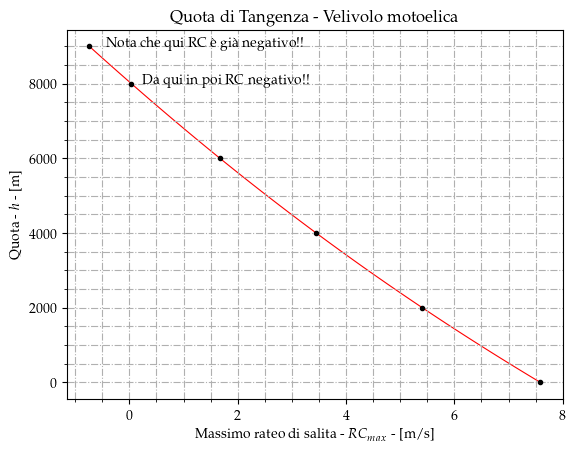

In [24]:
import numpy as np
import math
from scipy.interpolate import interp1d
from ambiance import Atmosphere
# Pacchetto per analisi grafica + LaTeX interpreter
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# Dati del velivolo
M    = 1338.0       # Massa del velivolo in [kg]
g    = 9.8065       # Accelerazione di gravità in [m/s^2]
W    = M * g        # Peso del velivolo in [N]
S    = 16.16        # Superficie alare in [m^2]
b    = 10.90        # Apertura alare in [m]
AR   = b**2/S       # Allungamento alare
WS   = W/S          # Carico alare in [N/m^2]
CD0  = 0.028        # Coefficiente di resistenza Zero-Lift
e    = 0.8          # Fattore di Oswald
etaP = 0.8          # Efficienza dell'elica
rho0 = 1.225        # Densità dell'aria al livello del mare in [kg/m^3] 
P0   = 230*0.75     # Potenza disponibile in [kW]
phi  = 1.0          # Manetta a pieno regime

# PUNTO P della polare
CLE = np.sqrt(CD0 * math.pi * AR * e)
CLP = CLE * np.sqrt(3)
CDP = 4 * CD0
EP  = CLP / CDP
DP  = W / EP
# Atmosfera standard
# Per esercizio può considerare un vettore di quote maggiormente denso
heights    = np.array([0.0, 2000.0, 4000.0, 6000.0, 8000.0, 9000.0]) # Questo è un numpy array con le quote in [m]
# atmosphere = Atmosphere(heights)
# NOTE: Si noti come le operazioni con i vettori vengono eseguite senza
#       che la sintassi del programma venga alterata
rho        = Atmosphere(heights).density            # Questo è un numpy array con le densità in [kg/m^3]
sigma      = rho / rho0                             # Questo è un numpy array con i rapporti di densità
V          = np.sqrt( (2 / rho) * (WS) * (1/CLP) )  # Questo è un numpy array con le velocità in [m/s]
PowP       = DP * V                                 # Questo è un numpy array con le potenze in [W] al punto P
PowDisp    = (P0*1000)*etaP*phi*sigma               # Questo è un numpy array con le potenze disponibili in [W] al variare della quota
RC         = ( (PowDisp - PowP) / W )               # Questo è un numpy array con i ratei di salita in [m/s]
# Risultati parziali
print(f'Coefficiente di portanza - PUNTO E:{CLE : .4f}')
print(f'Coefficiente di portanza - PUNTO P:{CLP : .4f}')
print(f'Coefficiente di resistenza - PUNTO P:{CDP : .4f}')
print(f'Efficienza - PUNTO P:{EP : .4f}')
print(f'Resistenza - PUNTO P:{DP : .4f} [N]')
print("========================================================")
for i in range(len(heights)):
    print(f'Densità a {heights[i] : .4f} [m]: {rho[i]} [kg/m^3]')
    print(f'Velocità            - PUNTO P a {heights[i]} [m]: {V[i] : .4f} [m/s]')
    print(f'Potenza necessaria  - PUNTO P a {heights[i]} [m]: {PowP[i] : .4f} [W]')
    print(f'Potenza disponibile - PUNTO P a {heights[i]} [m]: {PowDisp[i] : .4f} [W]')
    print(f'Rateo di salita     - PUNTO P a {heights[i]} [m]: {RC[i] : .4f} [m/s]')
    print("========================================================")
    if RC[i] < 0.0:
        print(f'RC negativo a {heights[i]} [m]')
        break

# Facciamo una bella funzione interpolante per i nostri dati
RCfunc = interp1d(heights, RC, kind='cubic') # Questa funzione serve principalmente ai fini grafici, in questo modo otteniamo una vera e propria funzione di h
h_vec  = np.linspace(0.0, 9000.0, 100)       # Si tratta di un vettore con 100 valori della quota, da h = 0.0, ad h = 9000.0 [m]
# NOTE: Con un piccolo snippet potrebbe individuare il punto esatto in cui il velivolo arriva alla tangenza teorica.
#       Si tratta semplicemente di imporre che il rateo di salita sia nullo!

# ====================================================================
# ========================= PLOTTING RESULTS =========================
# ====================================================================
fig  = plt.figure()
plt.plot(RCfunc(h_vec),    h_vec,    color="red", linewidth=0.8, linestyle = "solid", zorder=1)
plt.scatter(RC, heights, s=None, c='black', marker='.', cmap=None, norm=None,\
            vmin=None, vmax=None, alpha=1, linewidths=None,\
            edgecolors=None, plotnonfinite=False, data=None, label="Point S", zorder=2)
            # fontsize or size
            # float or {'xx-small', 'x-small', 'small', 'medium', 'large',
            # 'x-large', 'xx-large'}
            # fontweight or weight {a numeric value in range 0-1000, 'ultralight', 
            # 'light', 'normal', 'regular', 'book', 'medium', 'roman', 'semibold',
            # 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'}
label=r"Nota che qui RC è già negativo!!"
plt.text(RC[-1]+0.3, heights[-1], label, fontdict=None, fontsize='medium', fontweight='bold')
label=r"Da qui in poi RC negativo!!"
plt.text(RC[-2]+0.2, heights[-2], label, fontdict=None, fontsize='medium', fontweight='bold')
# plt.scatter(VA, nA, s=None, c='black', marker='.', cmap=None, norm=None,\
#             vmin=None, vmax=None, alpha=1, linewidths=None,\
#             edgecolors=None, plotnonfinite=False, data=None, label="Point A", zorder=2)
# plt.ylim(nmin - 0.5, nmax + 0.5)
# plt.xlim(0.0, VD + 10.0)
# plt.legend(loc="best")
plt.title(r"Quota di Tangenza - Velivolo motoelica") 
plt.xlabel(r'Massimo rateo di salita - $RC_{max}$ - [m/s]')
plt.ylabel(r'Quota - $h$ - [m]')
plt.minorticks_on()
plt.grid(True, linestyle='-.', which="both")
plt.minorticks_on()
# Decommenta per salvare in .pdf
# name_figure = 'QuotaTangenza' + str(n) + '.pdf'
# plt.savefig(name_figure, bbox_inches='tight')
plt.show()
